# 1. Delivery_time -> Predict delivery time using sorting time 

In [29]:
import pandas as pd
import numpy as np

In [2]:
# importing the dataset.
df= pd.read_csv("Delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#data structure
type(df)
df.shape

(21, 2)

In [4]:
#data types
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
# count of duplicated rows
df[df.duplicated()].shape

(0, 2)

In [6]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
#print thr duplicated rows
df[df.duplicated()]

,Delivery Time,Sorting Time


# Outlier Detection

<AxesSubplot:>

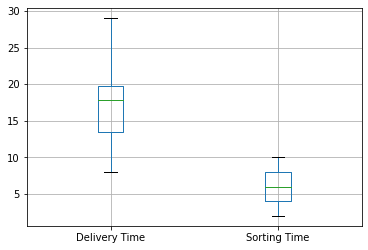

In [8]:
df.boxplot() #boxplot

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

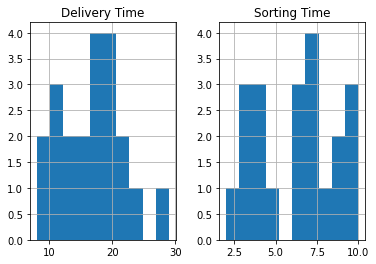

In [9]:
df.hist() #histogram

In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [19]:
#renaming the columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Missing values and imputation

<AxesSubplot:>

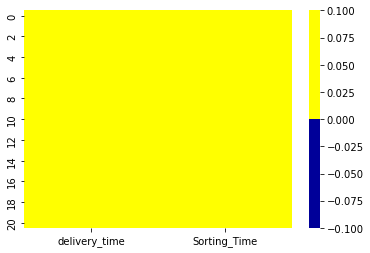

In [20]:
import seaborn as sns
cols= df.columns
colours= ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

# Scatter Plot and correlation Analysis

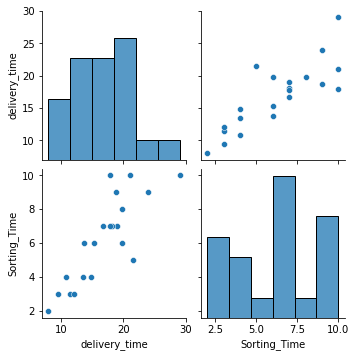

In [21]:
import seaborn as sns 
sns.pairplot(df)

In [22]:
#correlation
df.corr()

,delivery_time,Sorting_Time
delivery_time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# Model Generation 

In [23]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time ~ Sorting_Time",data = df).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='delivery_time'>

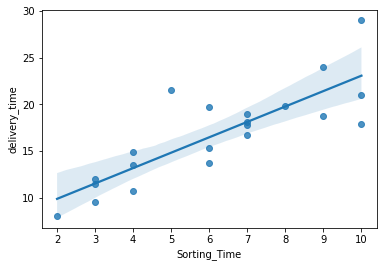

In [24]:
sns.regplot(x="Sorting_Time" , y="delivery_time" , data=df)

In [25]:
#coeffients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [26]:
# t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [27]:
#rsquare values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [64]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [30]:
new_df= pd.Series([5,8])
new_df

0    5
1    8
dtype: int64

In [31]:
df_pred= pd.DataFrame(new_df,columns=["Sorting_Time"])
df_pred

,Sorting_Time
0,5
1,8


In [32]:
model.predict(df_pred)

0    14.827833
1    19.774893
dtype: float64

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [34]:
# importing the dataset
df2= pd.read_csv("Salary_Data.csv")
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [35]:
#data structure
type(df2)
df2.shape

(30, 2)

In [36]:
#data types
df2.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [37]:
# count of duplicated rows
df2[df2.duplicated()].shape

(0, 2)

In [39]:
#print thr duplicated rows
df2[df2.duplicated()]

,YearsExperience,Salary


# Outlier Detection

<AxesSubplot:>

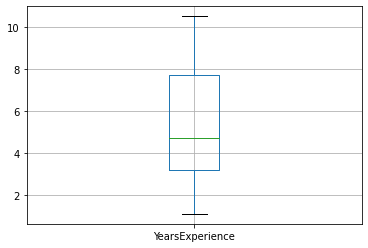

In [45]:
df2.boxplot(column=['YearsExperience'])

<AxesSubplot:>

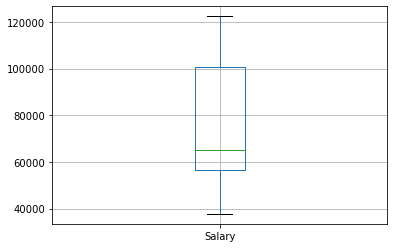

In [46]:
df2.boxplot(column=['Salary'])

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

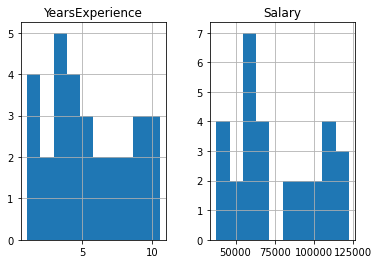

In [42]:
df2.hist()

In [43]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Missing Values and imputations

<AxesSubplot:>

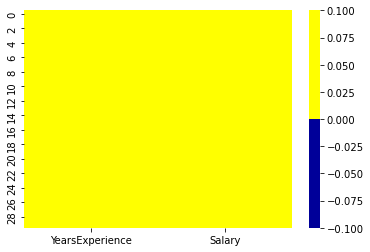

In [51]:
cols2= df2.columns
colours2= ['#000099', '#ffff00'] # specify the colours - yellow is not missing. blue is  missing.
sns.heatmap(df2[cols2].isnull(),cmap=sns.color_palette(colours2))

# Scatter plot and Correlation Analysis

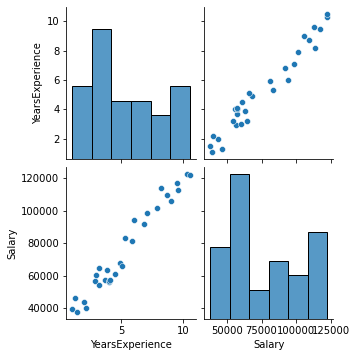

In [52]:
import seaborn as sns
sns.pairplot(df2)

In [53]:
#correlation
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model Creation


In [54]:
import statsmodels.formula.api as smf
model2= smf.ols("Salary~YearsExperience", data=df2).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

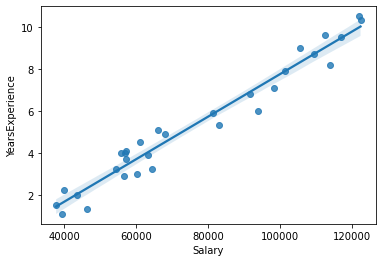

In [55]:
sns.regplot(x="Salary" , y="YearsExperience" , data=df2)

In [56]:
#coefficients
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [57]:
#t and p values
print(model2.tvalues, '\n', model2.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [58]:
#r squared values
(model2.rsquared,model2.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Model Prediction

In [59]:
# manual prediction for say 3 years
salary= ( 25792.200199)+(9449.962321)*3
salary

54142.087162

In [60]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [61]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [63]:
model2.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64